# Explore here

In [22]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

os.makedirs("../data/raw", exist_ok=True)

data.to_csv("../data/raw/health_data.csv", index=False)

health_data = pd.DataFrame(data)

health_data.head(5)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [2]:
health_data.shape

(3140, 108)

In [3]:
health_data.info(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 108 columns):
 #    Column                                                                         Dtype  
---   ------                                                                         -----  
 0    fips                                                                           int64  
 1    TOT_POP                                                                        int64  
 2    0-9                                                                            int64  
 3    0-9 y/o % of total pop                                                         float64
 4    19-Oct                                                                         int64  
 5    10-19 y/o % of total pop                                                       float64
 6    20-29                                                                          int64  
 7    20-29 y/o % of total pop                         

In [4]:
#eliminate irrelevant information
health_data_num = health_data[["fips", "TOT_POP", "Population Aged 60+", "county_pop2018_18 and older", "White-alone pop","Black-alone pop", 
                           "Native American/American Indian-alone pop", "Asian-alone pop", "Hawaiian/Pacific Islander-alone pop",
                           "Two or more races pop", "Less than a high school diploma 2014-18", "High school diploma only 2014-18", 
                           "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18","Median_Household_Income_2018", "Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)", 
                            "Total nurse practitioners (2019)", "Total physician assistants (2019)", "Total Hospitals (2019)", "Total Specialist Physicians (2019)", "anycondition_number",
                            "Obesity_number", "Heart disease_number", "COPD_number", "diabetes_number", "CKD_number"]]

health_data_num.head()

,fips,TOT_POP,Population Aged 60+,county_pop2018_18 and older,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,...,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Total Specialist Physicians (2019),anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number
0,1001,55601,10523,42438,42660,10915,267,681,62,1016,...,28.859137,6.085786,1.148905,72.142154,20181,15193,3345,3644,5462,1326
1,1003,218022,53519,170912,190301,19492,1684,2508,146,3891,...,113.162114,23.863512,4.505074,282.882982,68790,50761,13414,14692,20520,5479
2,1005,24881,6150,19689,12209,12042,164,113,46,307,...,12.914231,2.723340,0.514126,32.283033,11325,8013,2159,2373,3870,887
3,1007,22400,4773,17813,17211,4770,98,53,26,242,...,11.626493,2.451783,0.462860,29.063942,9190,6894,1533,1789,2511,595
4,1009,57840,13600,44448,55456,950,378,185,70,801,...,30.021267,6.330854,1.195171,75.047251,20584,15112,4101,4661,6017,1507


In [5]:
health_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 26 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   fips                                                                    3140 non-null   int64  
 1   TOT_POP                                                                 3140 non-null   int64  
 2   Population Aged 60+                                                     3140 non-null   int64  
 3   county_pop2018_18 and older                                             3140 non-null   int64  
 4   White-alone pop                                                         3140 non-null   int64  
 5   Black-alone pop                                                         3140 non-null   int64  
 6   Native American/American Indian-alone pop                               3140 non

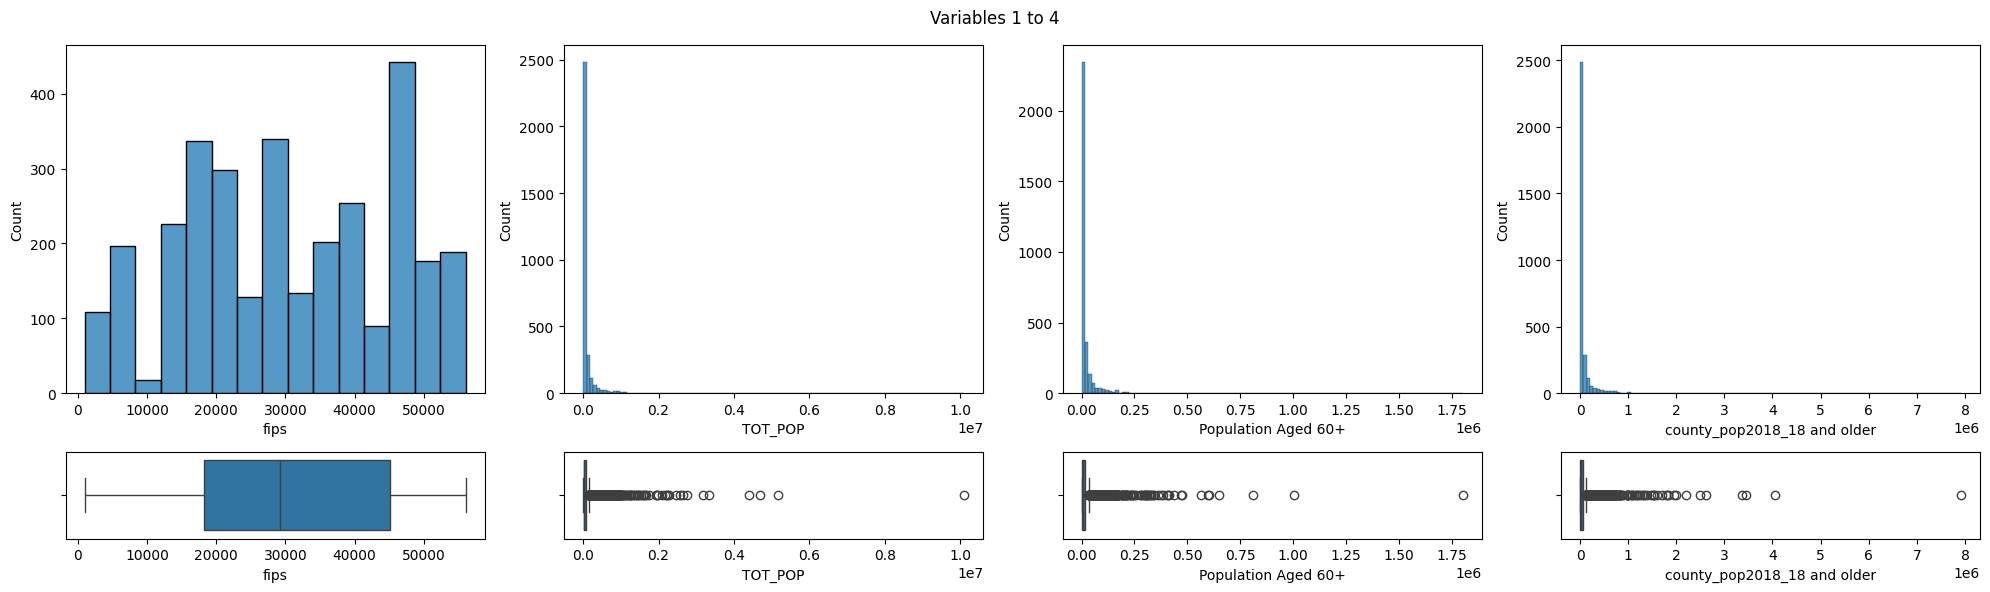

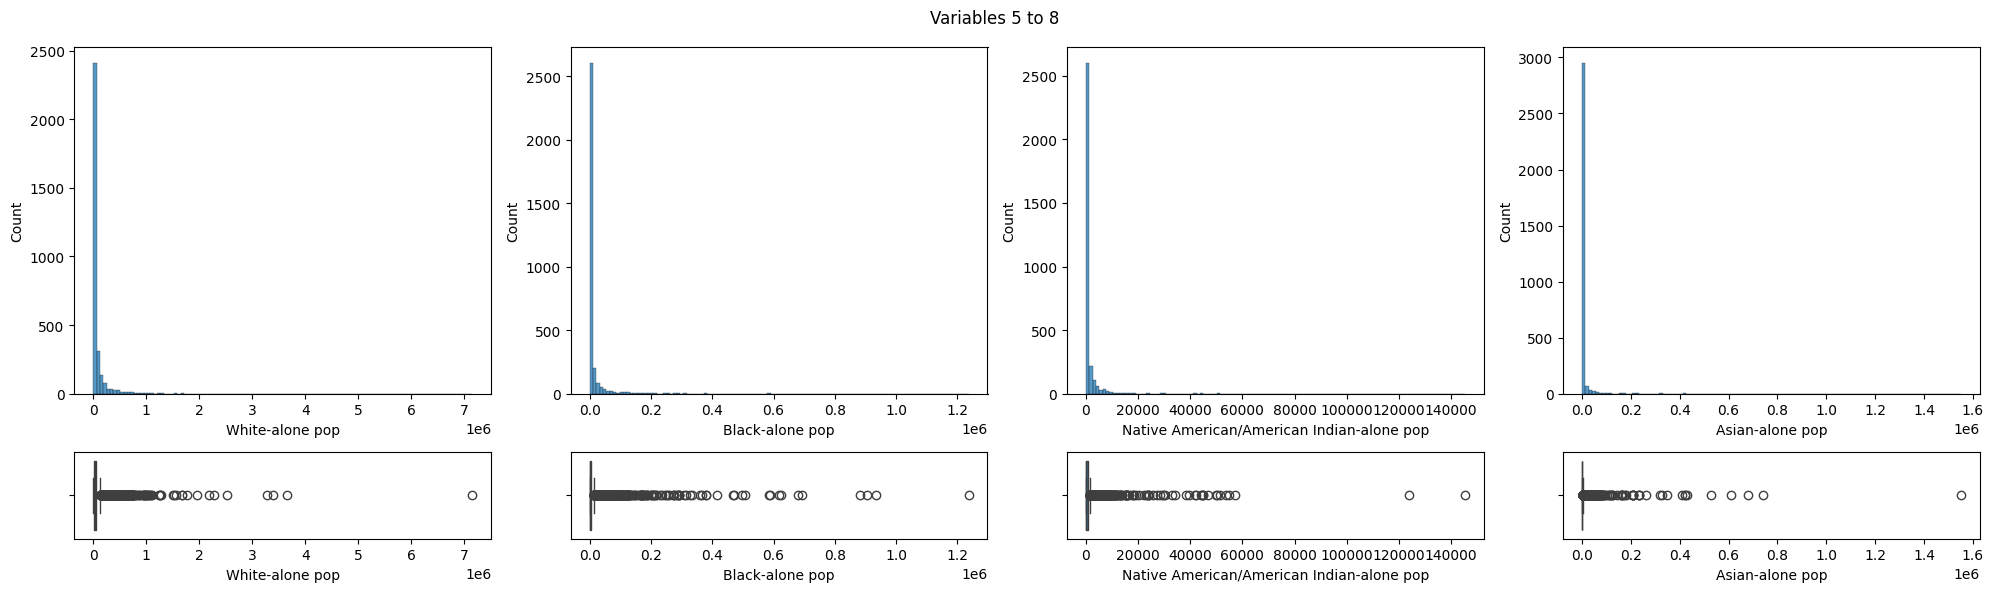

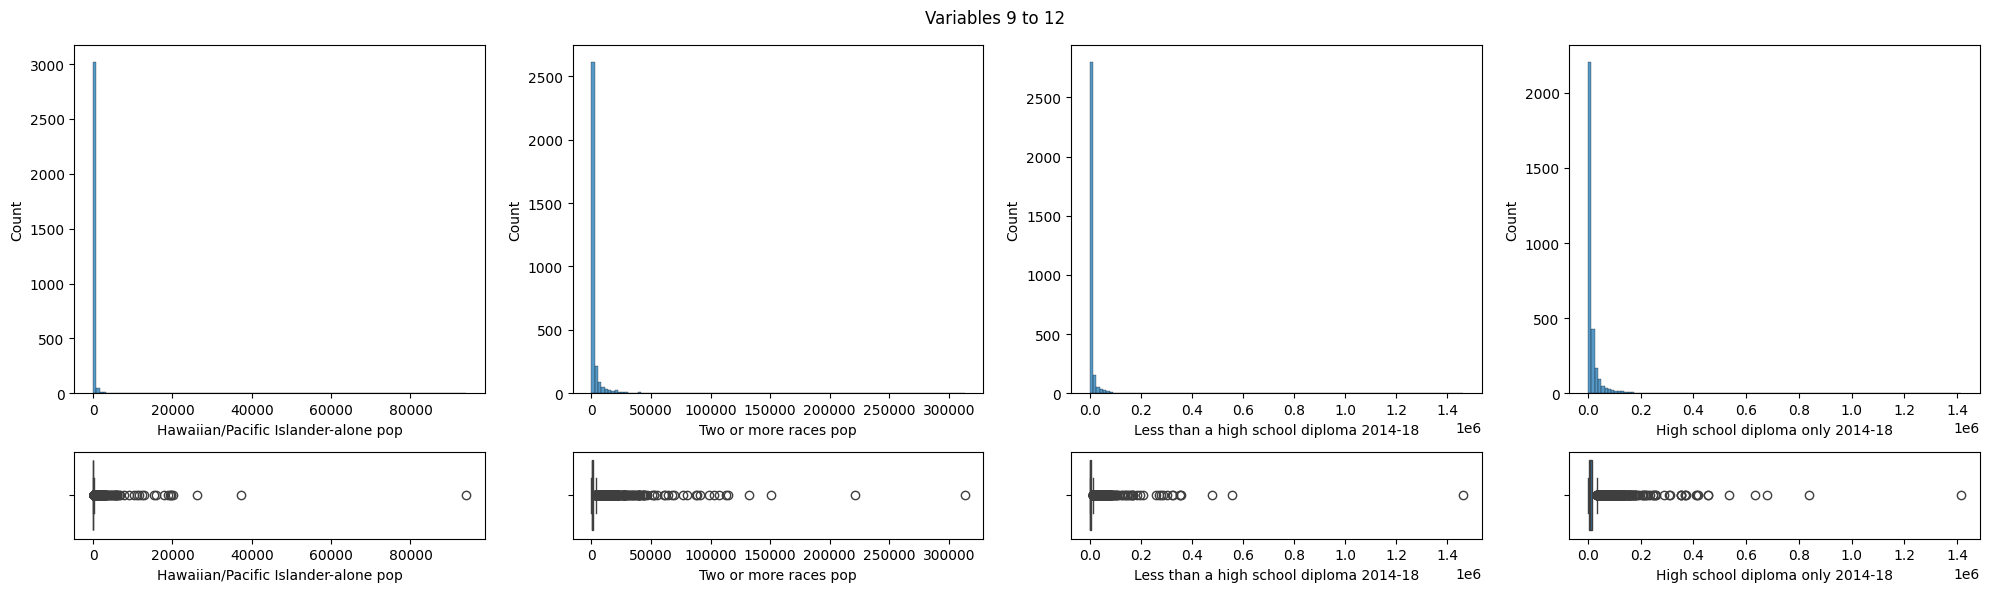

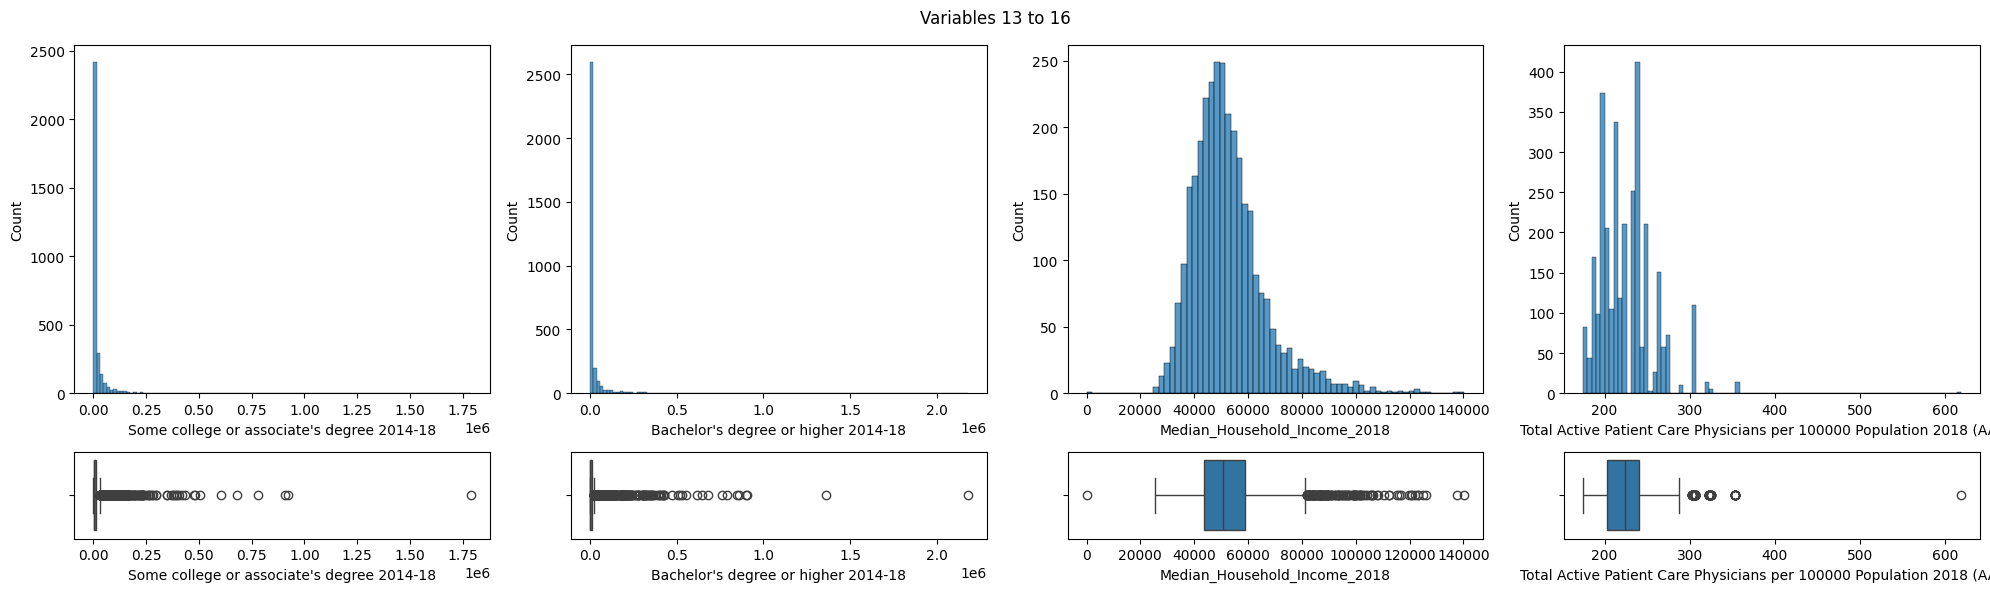

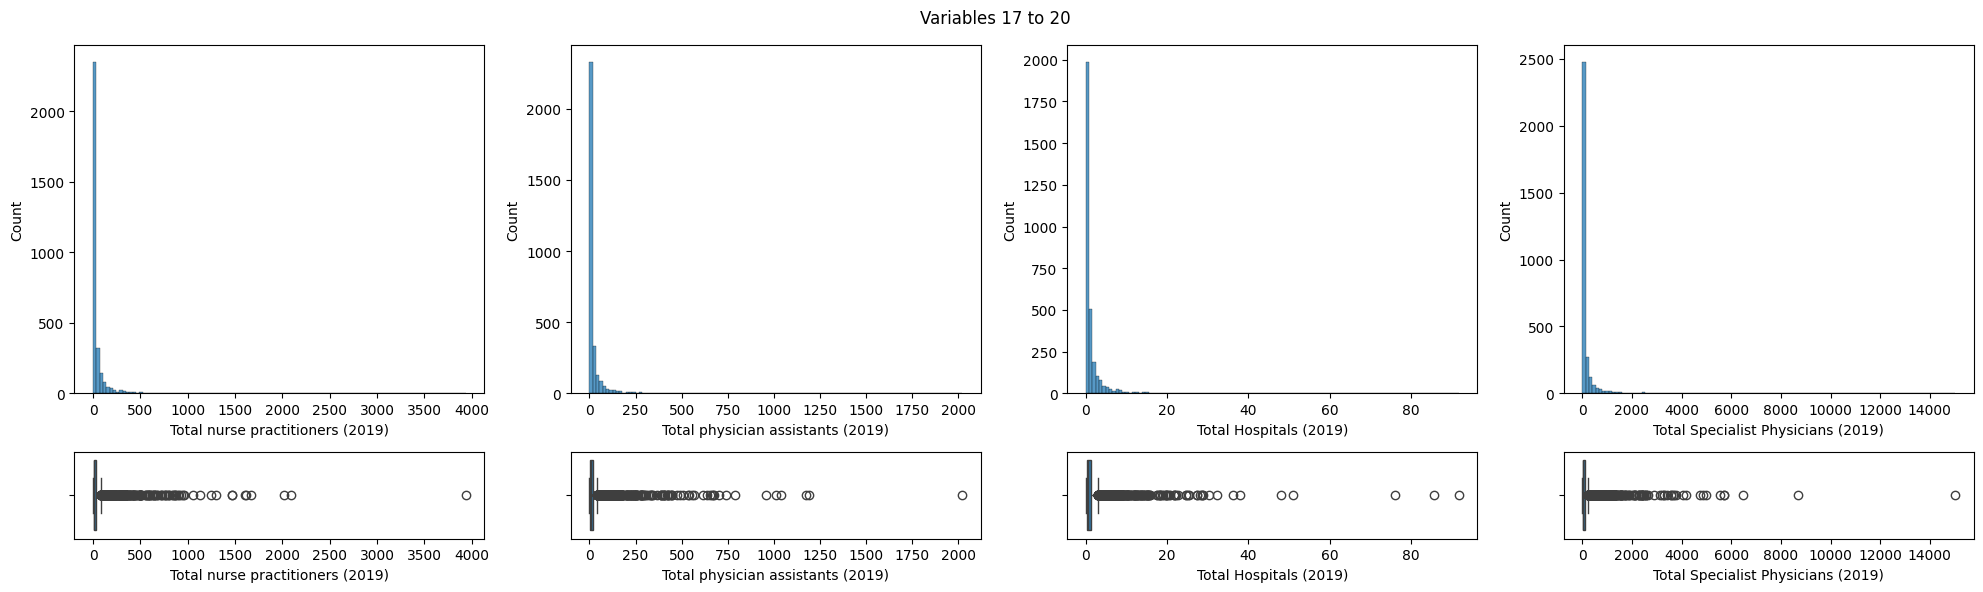

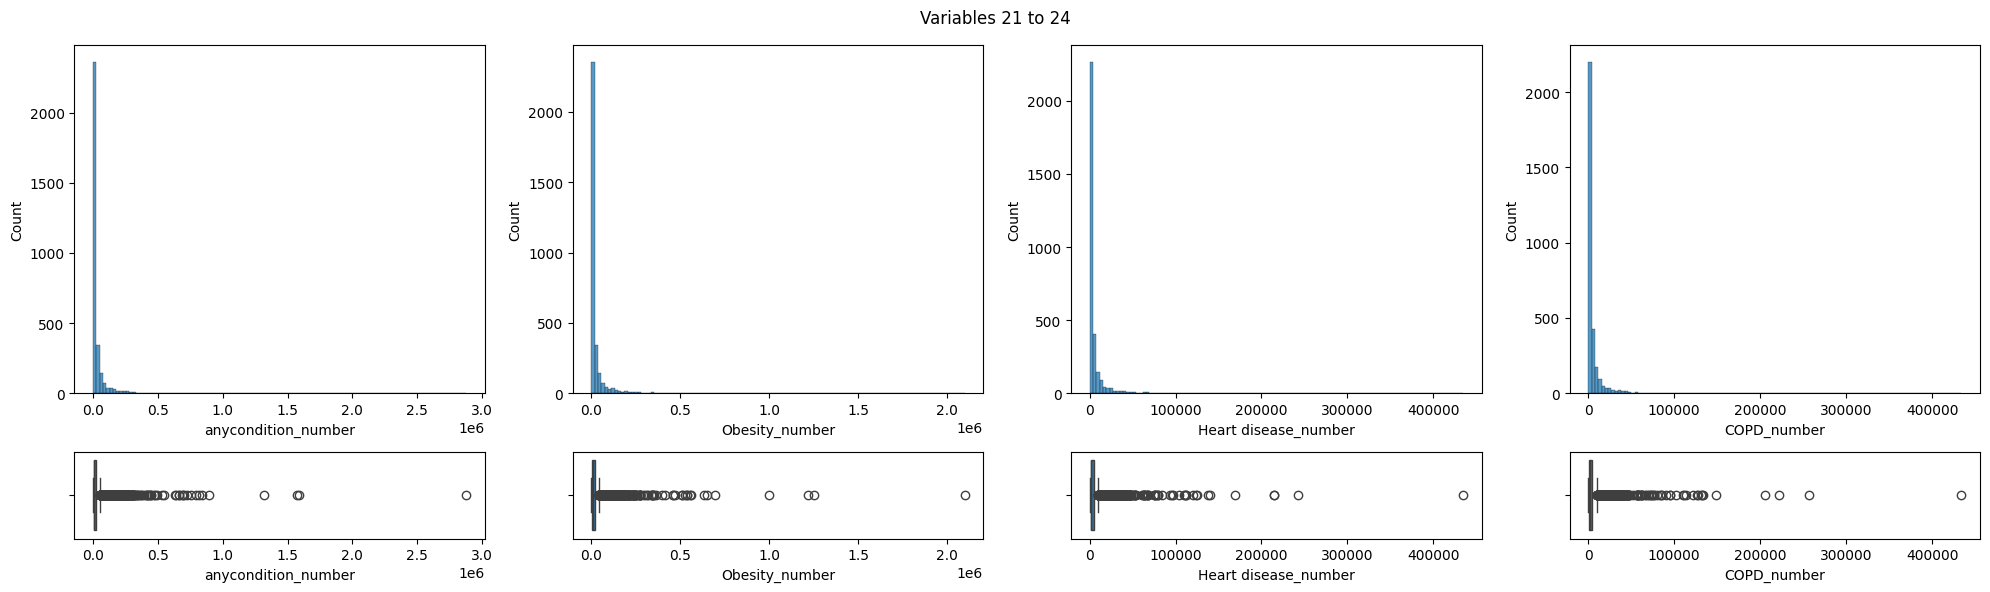

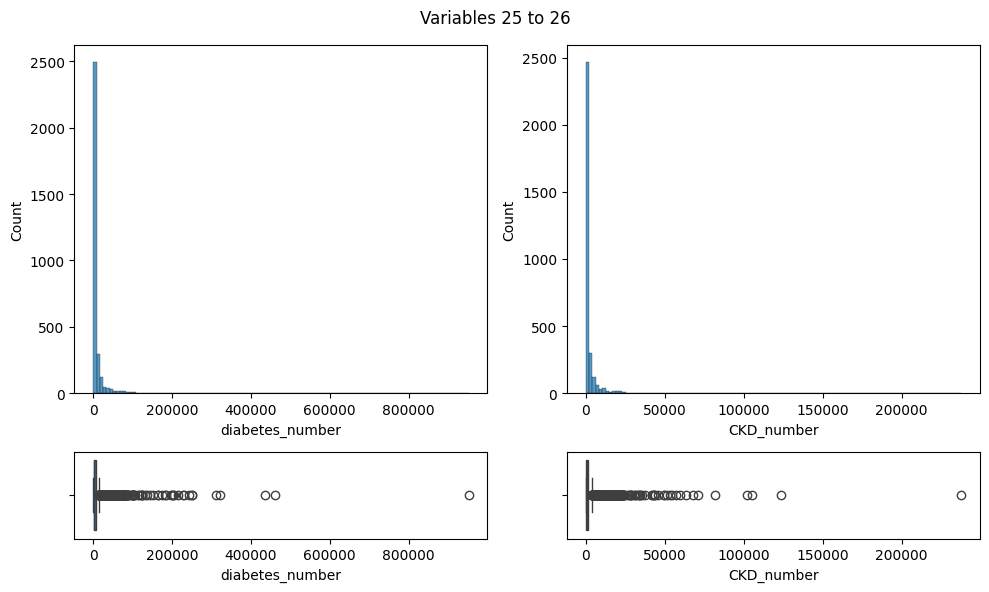

In [6]:
columns = health_data_num.columns
batch_size = 4

# Loop in batches of 4
for start in range(0, len(columns), batch_size):
    end = min(start + batch_size, len(columns))
    batch_cols = columns[start:end]

    fig, axis = plt.subplots(2, len(batch_cols), figsize=(5 * len(batch_cols), 6), 
                             gridspec_kw={"height_ratios": [4, 1]})

    for i, col in enumerate(batch_cols):
        sns.histplot(ax=axis[0, i], data=health_data_num, x=col)
        sns.boxplot(ax=axis[1, i], data=health_data_num, x=col)

    fig.suptitle(f"Variables {start + 1} to {end}")
    plt.tight_layout()
    plt.show()

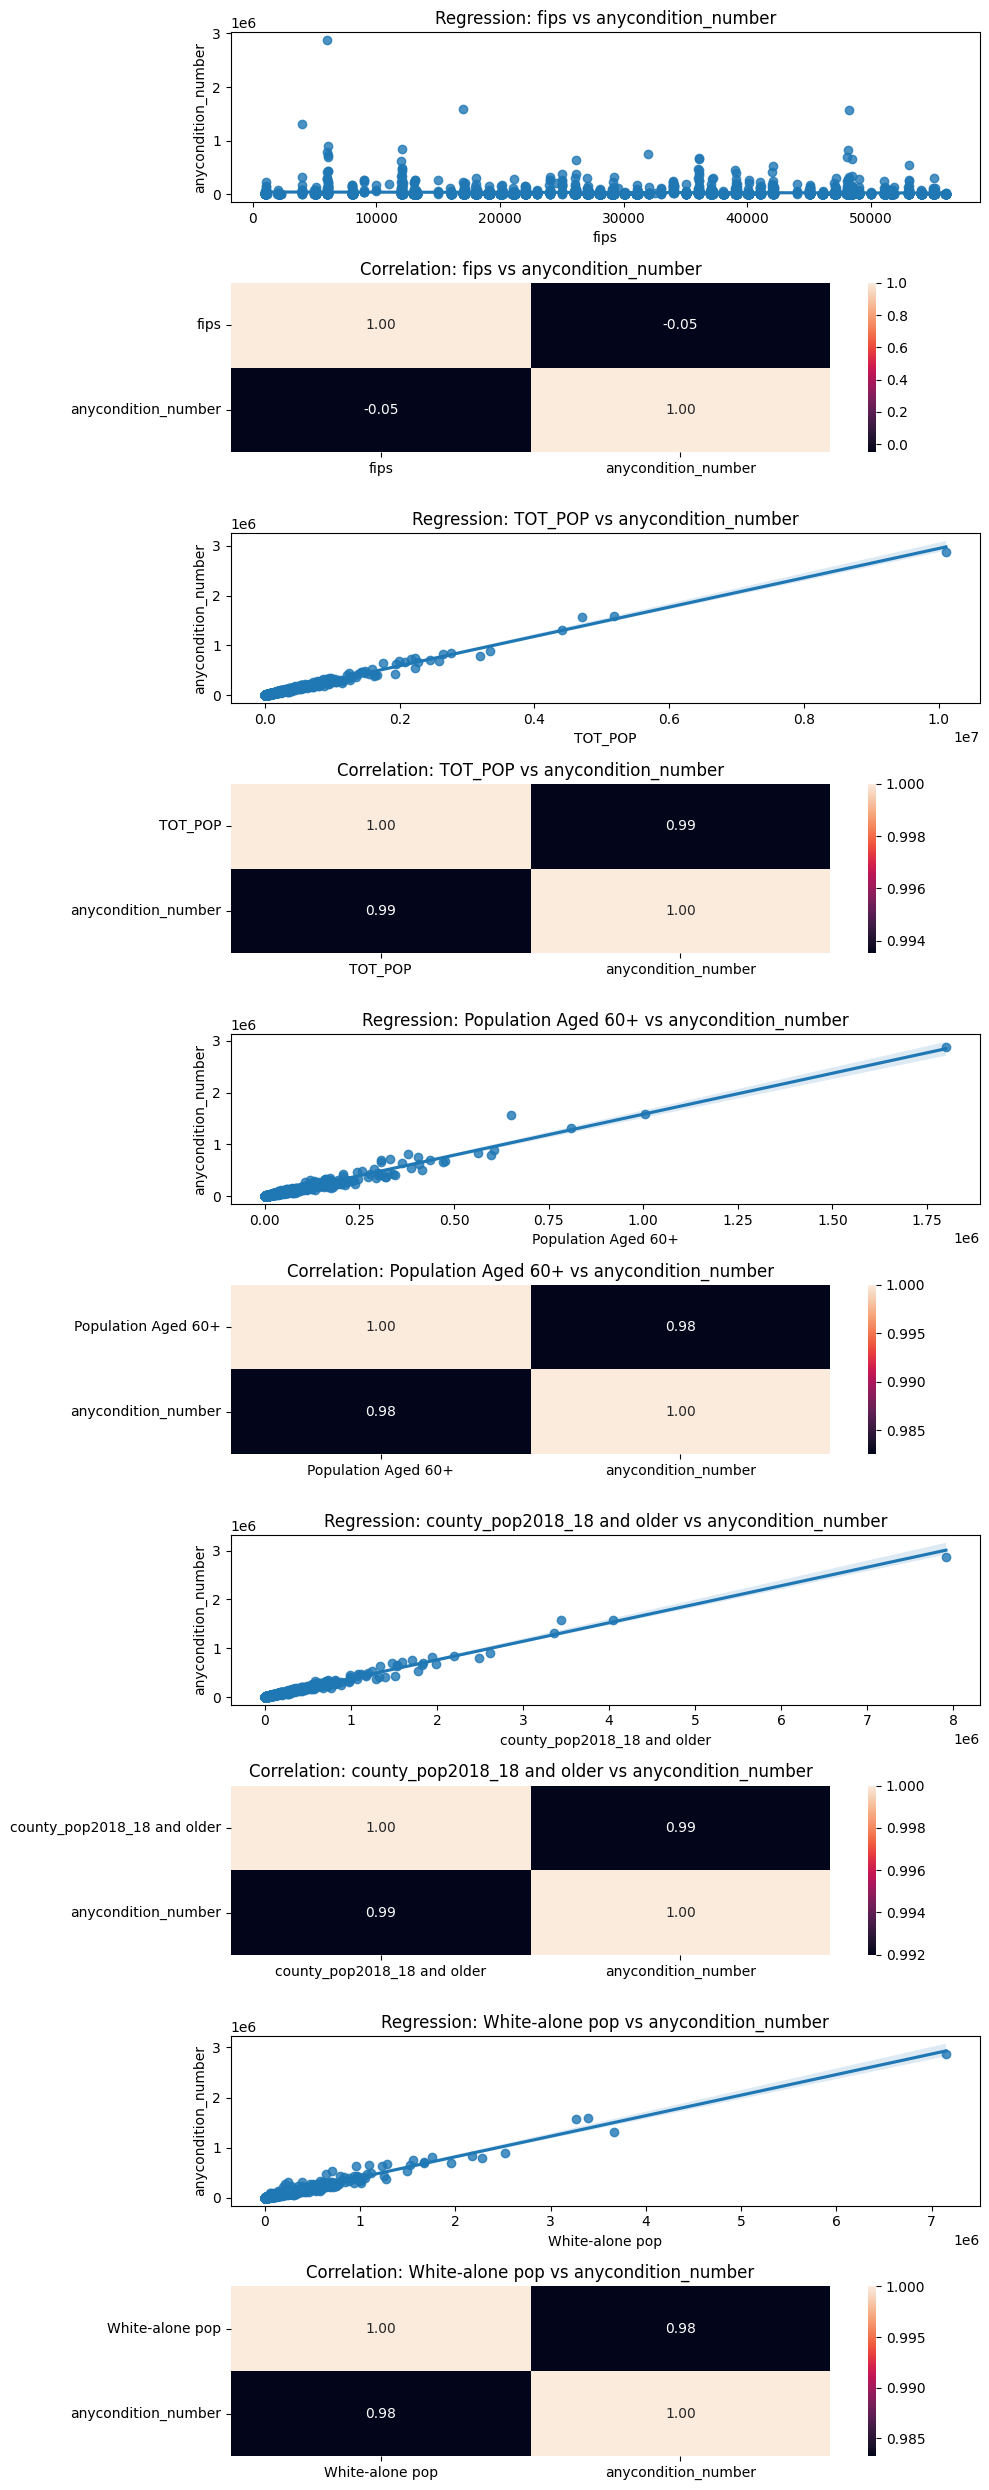

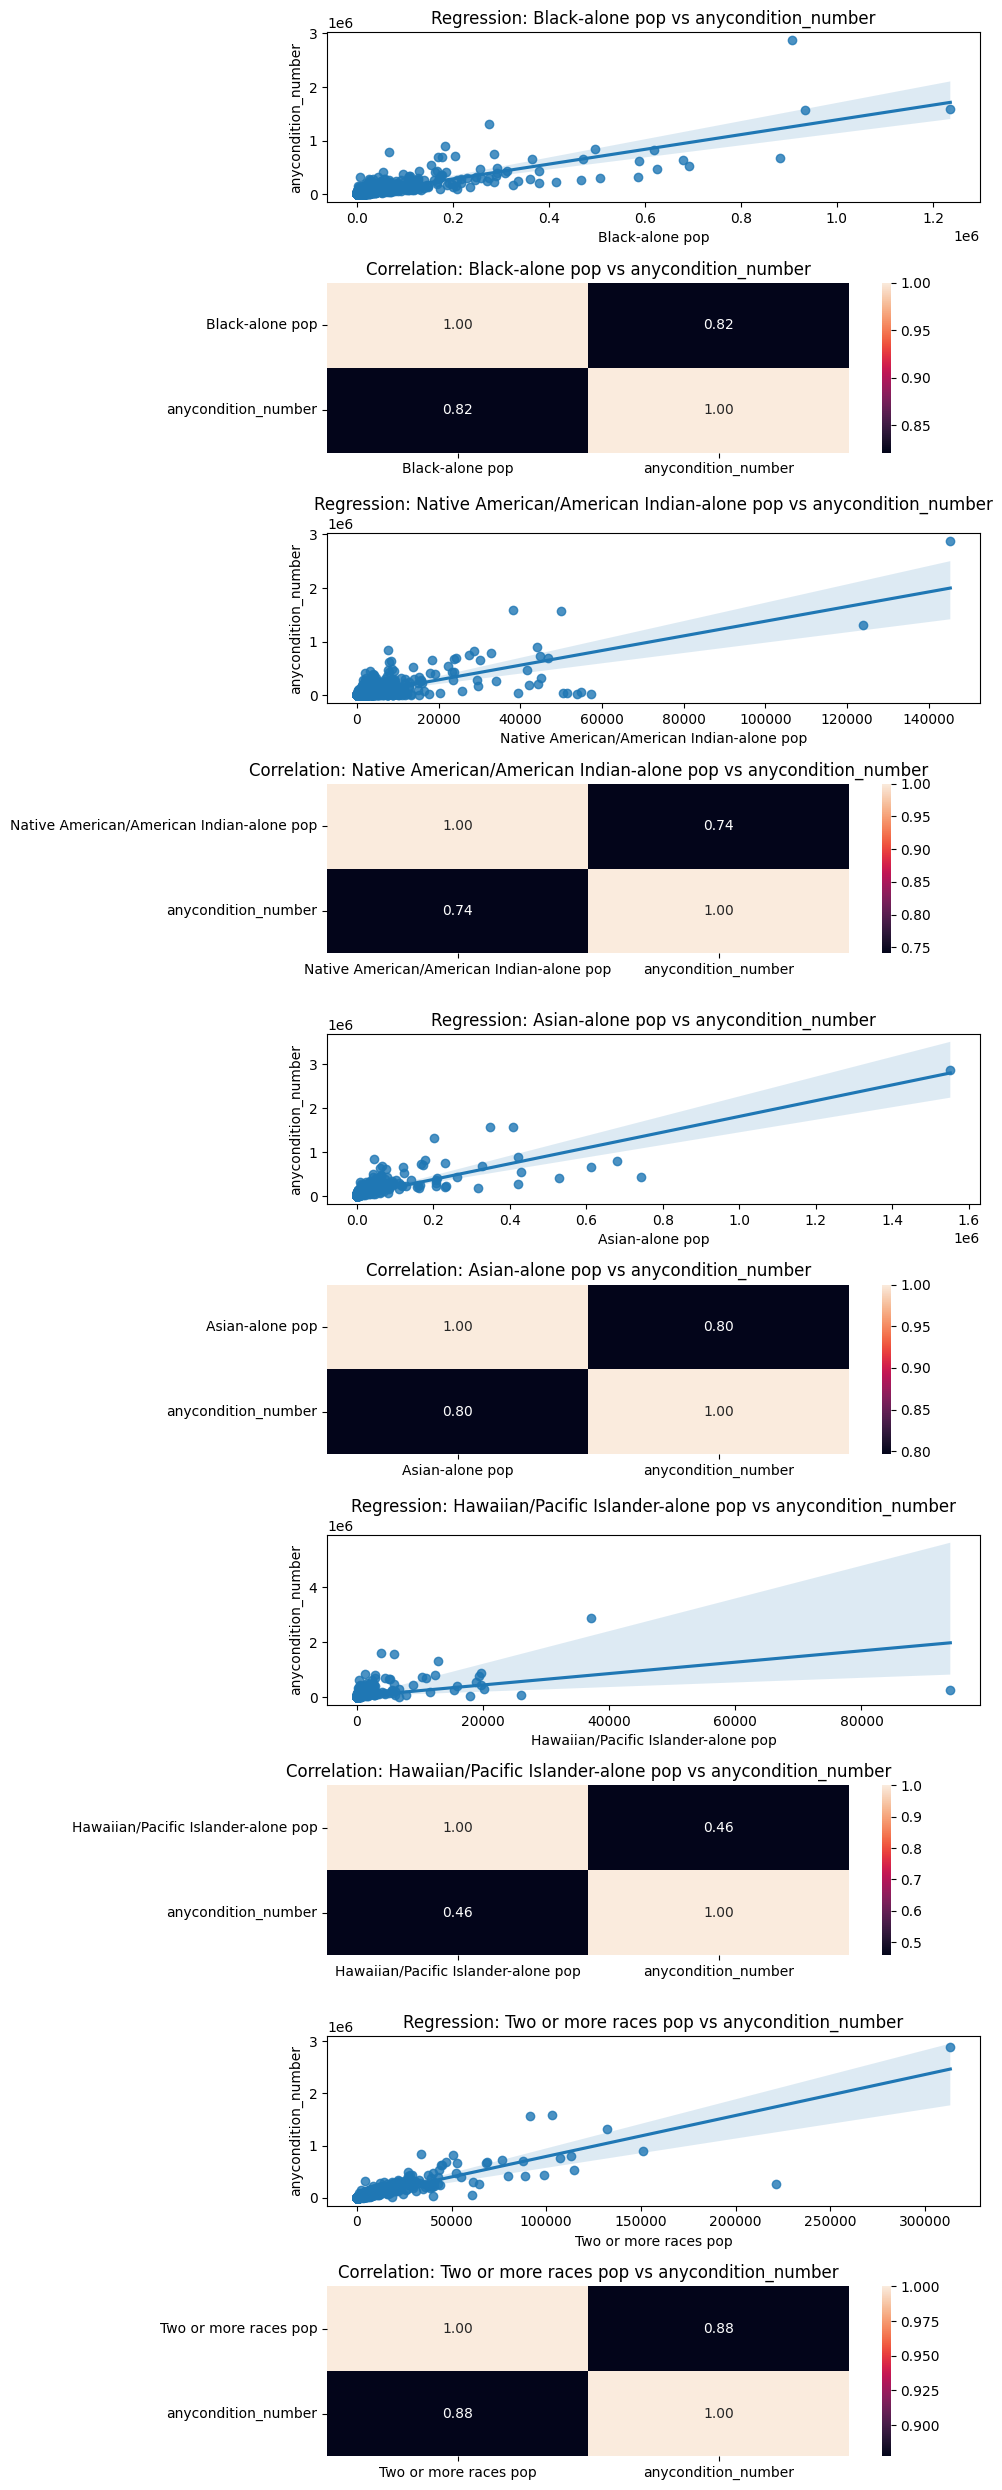

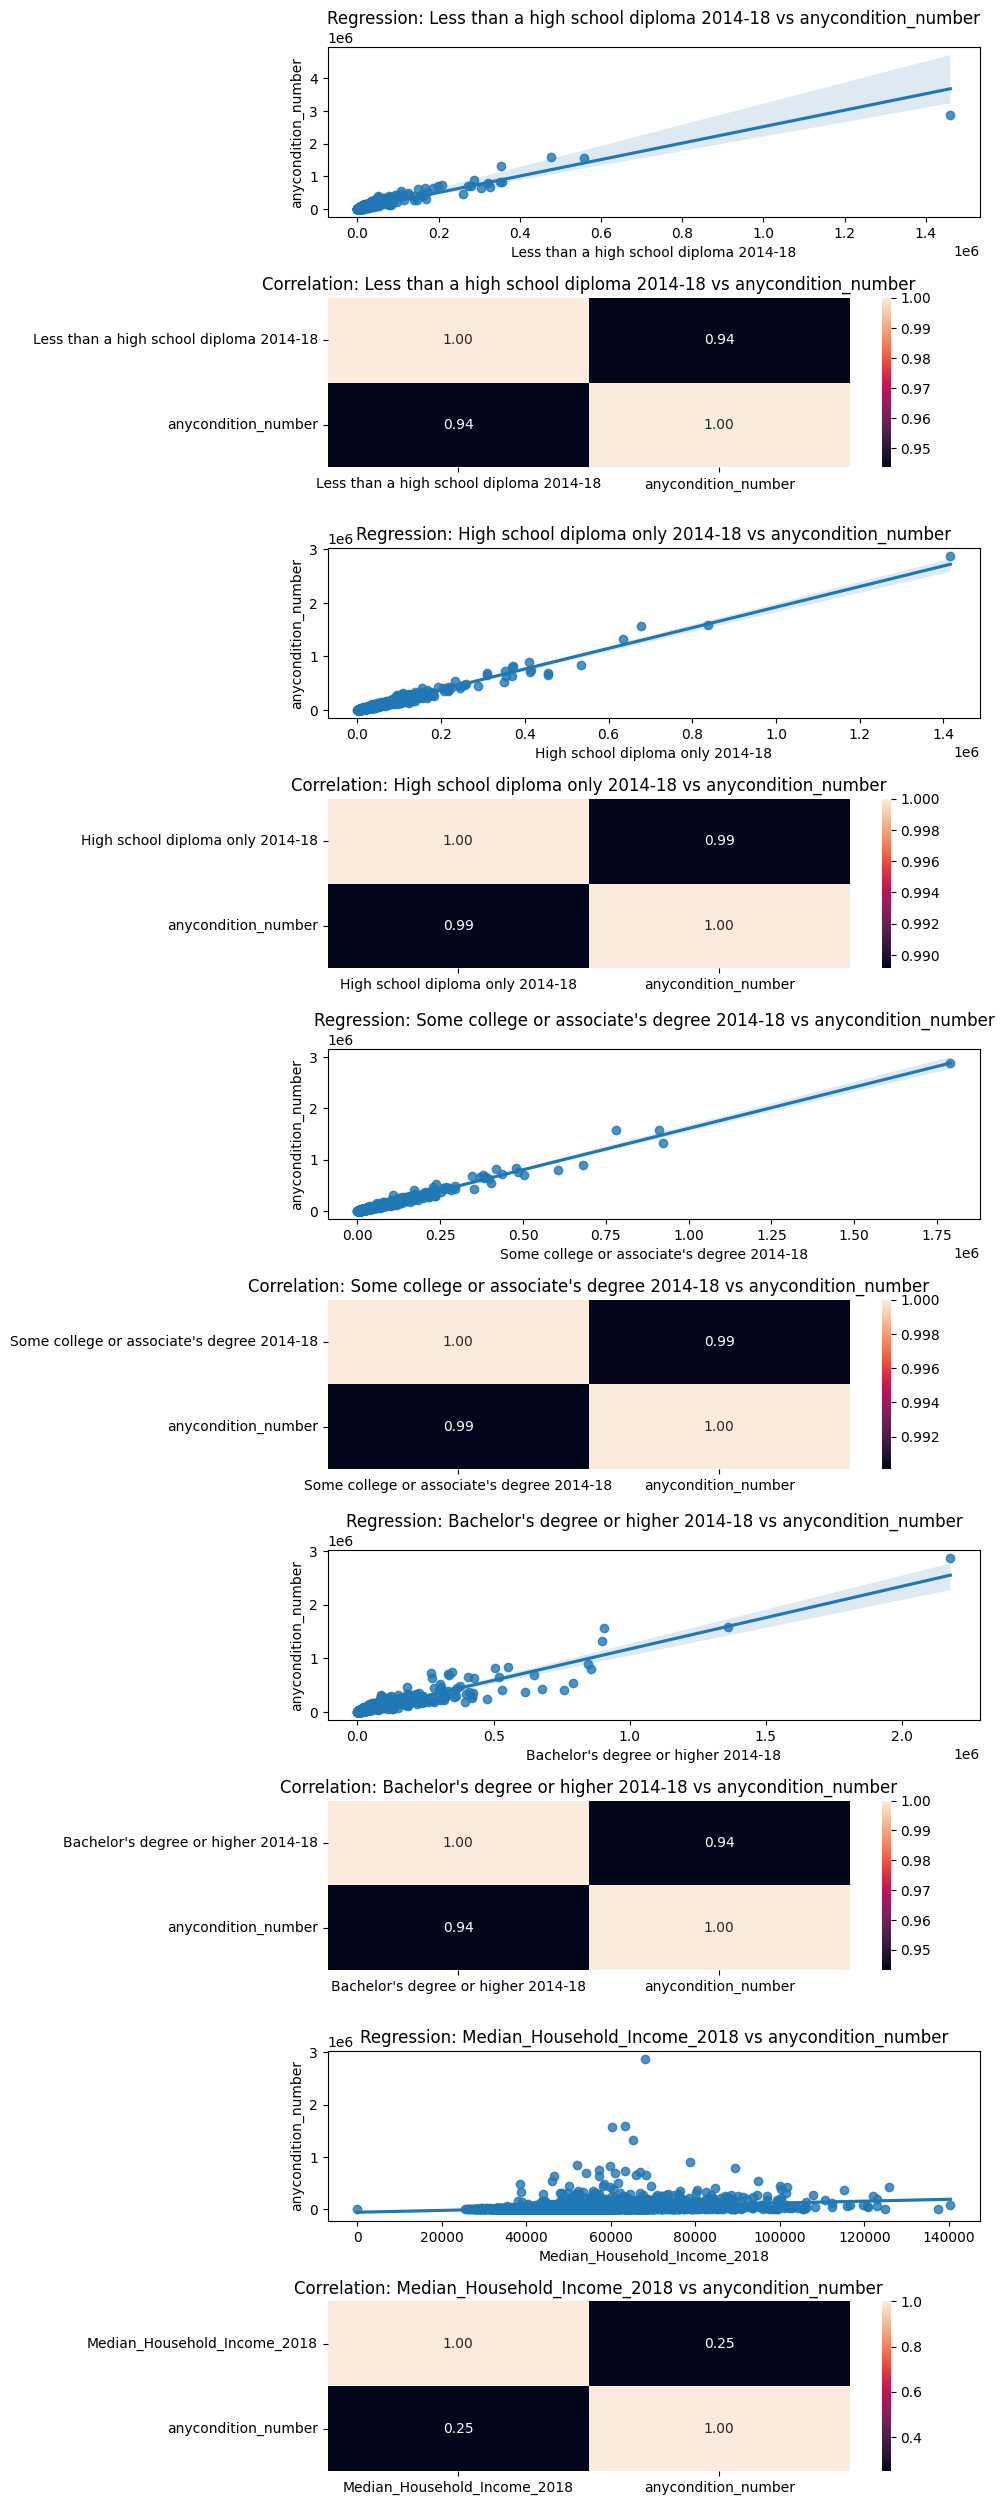

/tmp/ipykernel_39835/1170110977.py:32: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


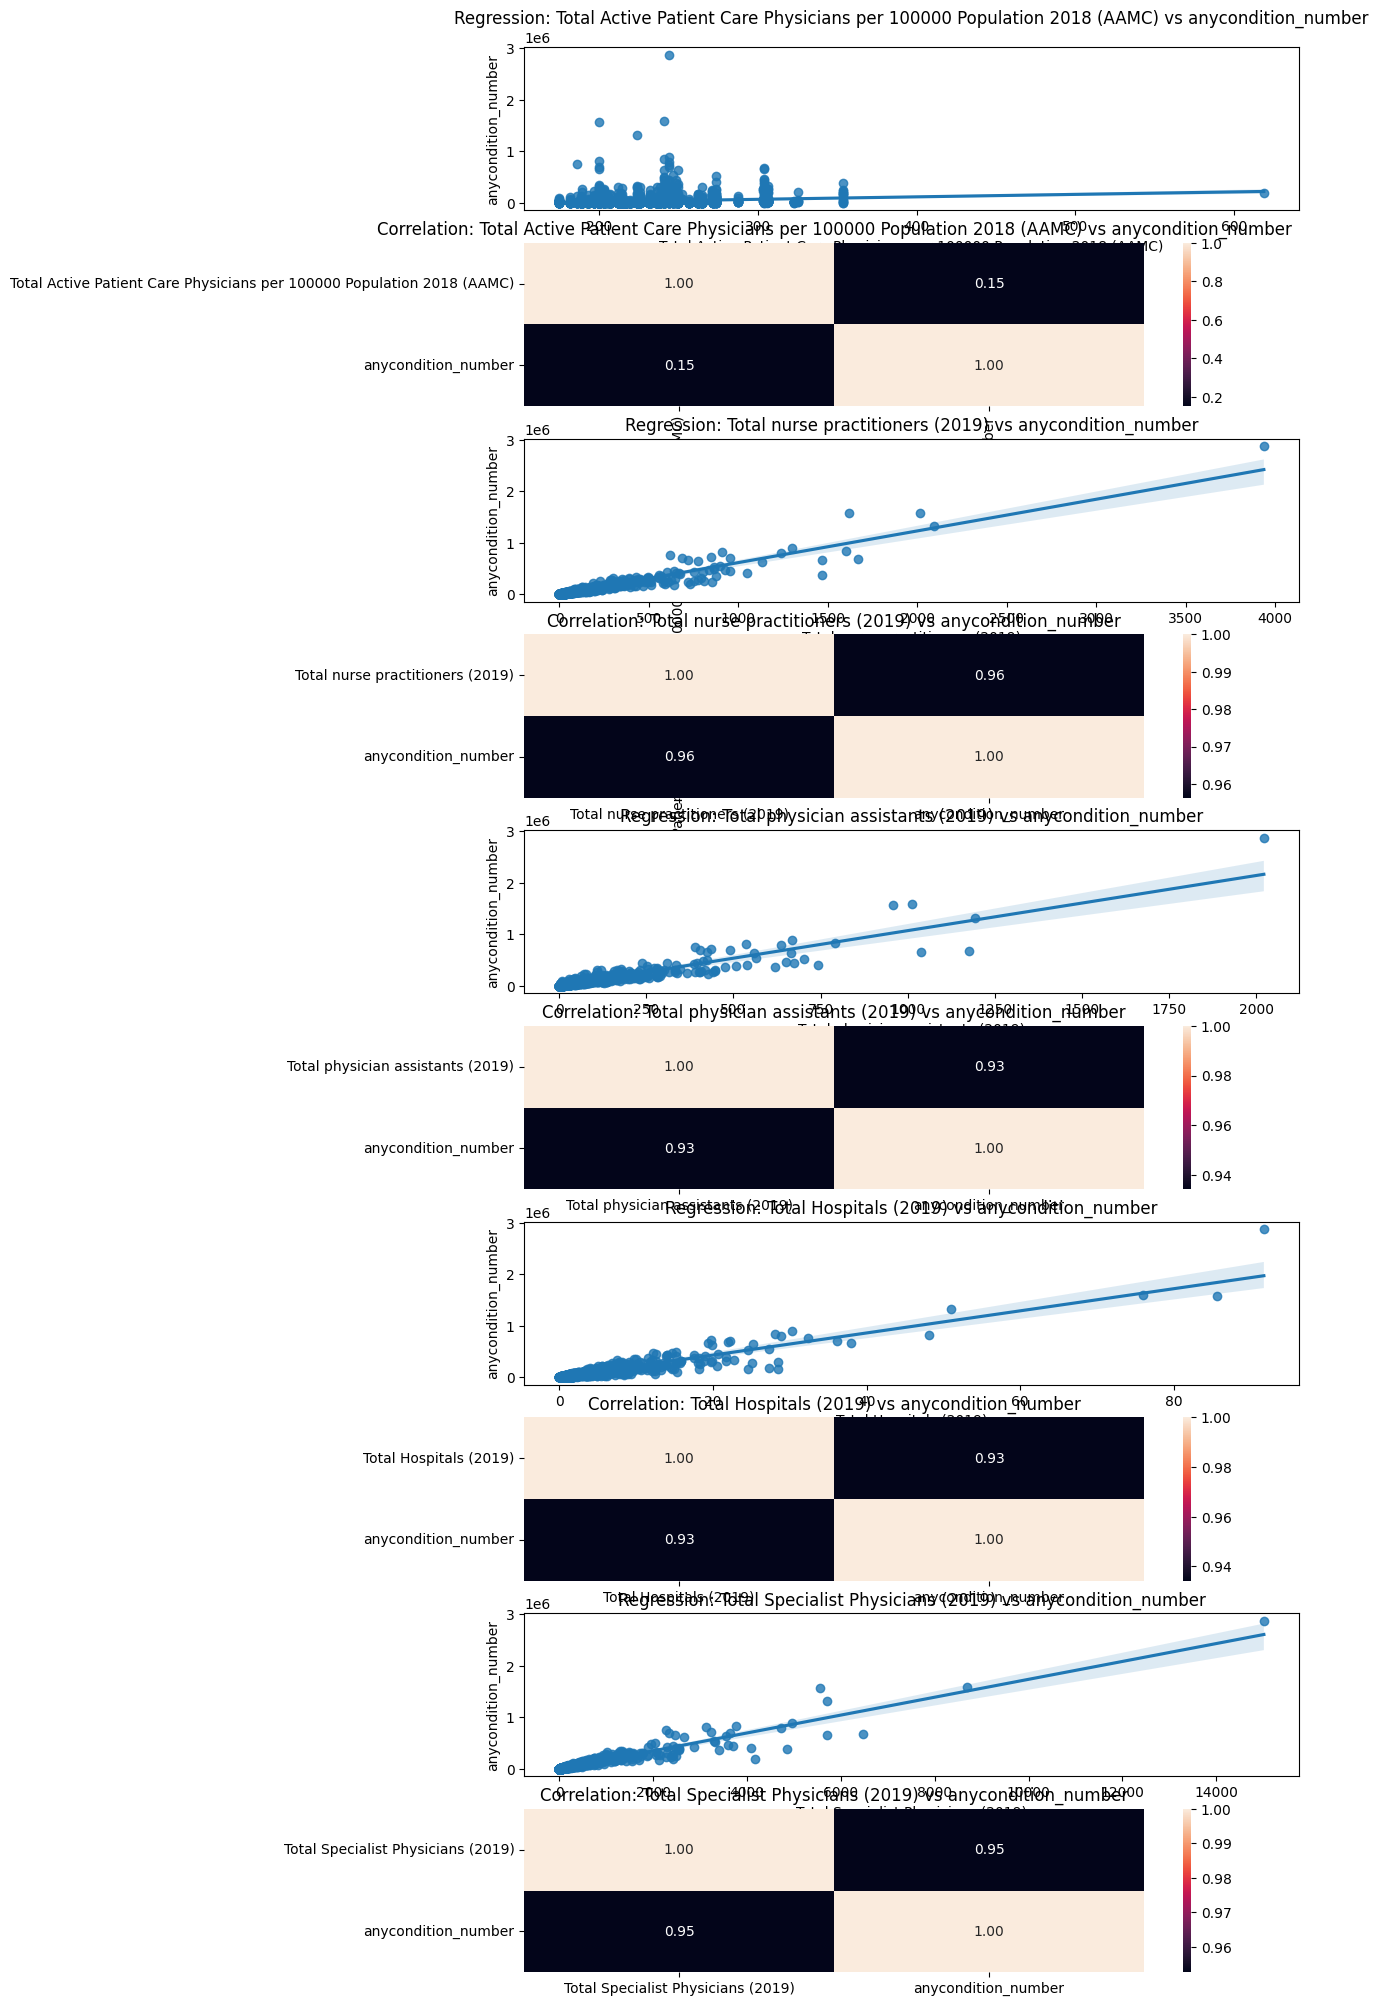

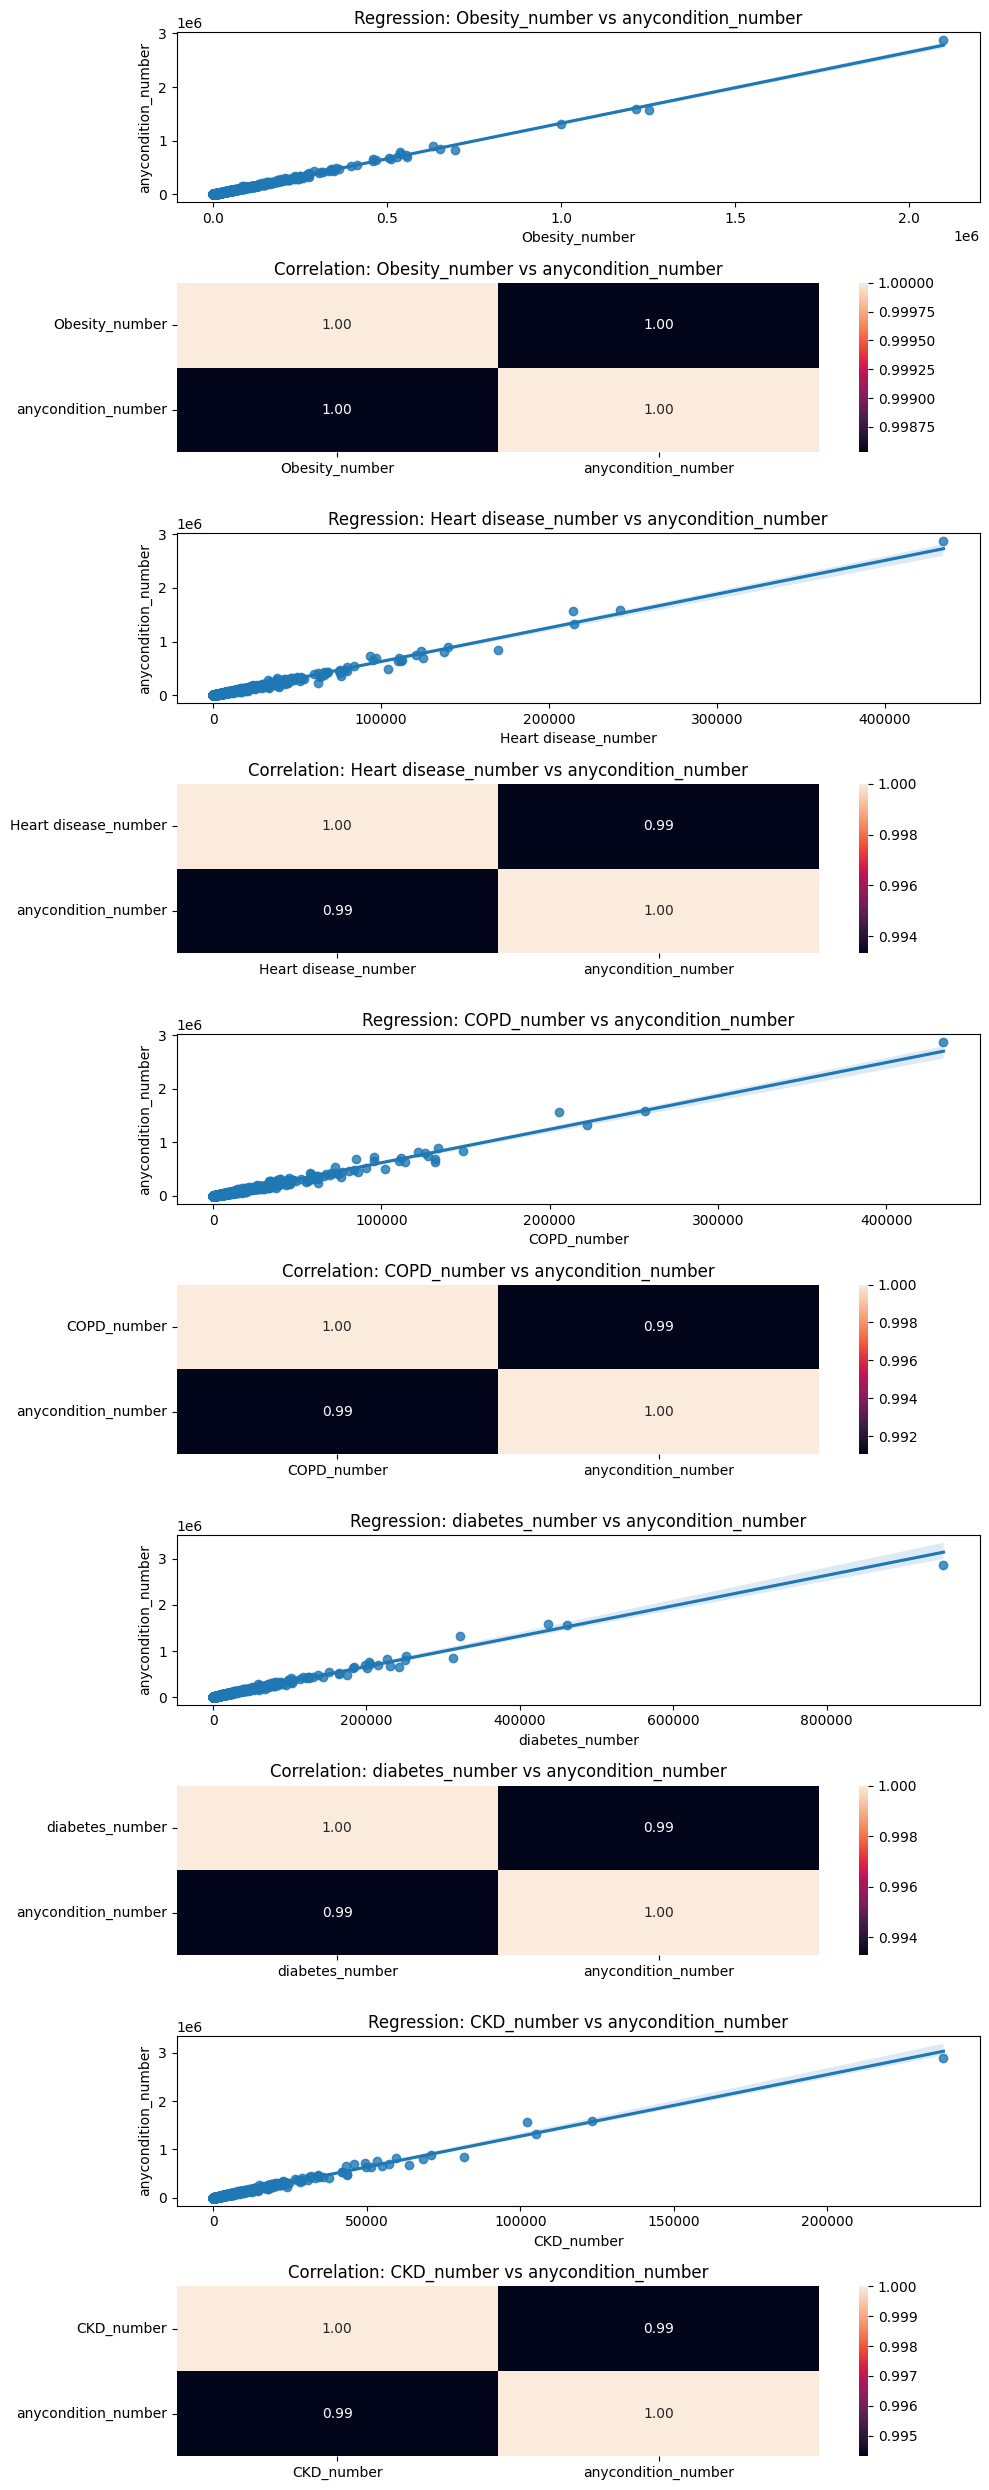

In [ ]:
target = "anycondition_number"

# Filter numeric columns except target
columns = [
    col for col in health_data_num.columns
    if col != target and pd.api.types.is_numeric_dtype(health_data_num[col])
]

batch_size = 5

# Loop in batches of 5 columns
for start in range(0, len(columns), batch_size):
    end = min(start + batch_size, len(columns))
    batch_cols = columns[start:end]

    fig, axis = plt.subplots(2 * len(batch_cols), 1, figsize=(10, 5 * len(batch_cols)))

    for i, col in enumerate(batch_cols):
        try:
            # Regression plot
            sns.regplot(ax=axis[2*i],data=health_data_num,x=col,y=target)
            axis[2*i].set_title(f"Regression: {col} vs {target}")

            # Correlation heatmap
            corr = health_data_num[[col, target]].corr()
            sns.heatmap(corr,annot=True,fmt=".2f", ax=axis[2*i + 1])
            axis[2*i + 1].set_title(f"Correlation: {col} vs {target}")

        except Exception as e:
            print(f"⚠️ Error plotting {col}: {e}")

    plt.tight_layout()
    plt.show()

In [9]:

# Count NaN

health_data_num.isnull().sum().sort_values(ascending = False)

fips                                                                      0
TOT_POP                                                                   0
Population Aged 60+                                                       0
county_pop2018_18 and older                                               0
White-alone pop                                                           0
Black-alone pop                                                           0
Native American/American Indian-alone pop                                 0
Asian-alone pop                                                           0
Hawaiian/Pacific Islander-alone pop                                       0
Two or more races pop                                                     0
Less than a high school diploma 2014-18                                   0
High school diploma only 2014-18                                          0
Some college or associate's degree 2014-18                                0
Bachelor's d

In [39]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(health_data_num)
df_scal = pd.DataFrame(scal_features, index = health_data_num.index, columns= health_data_num.columns)
df_scal.head()

,fips,TOT_POP,Population Aged 60+,county_pop2018_18 and older,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,...,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Total Specialist Physicians (2019),anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number
0,0.000000,0.005493,0.005830,0.005350,0.005962,0.008830,0.001838,0.000439,0.000659,0.003243,...,0.007322,0.003004,0.012513,0.004798,0.007000,0.007230,0.007677,0.008379,0.005724,0.005564
1,0.000036,0.021566,0.029713,0.021578,0.026607,0.015768,0.011593,0.001616,0.001552,0.012421,...,0.028731,0.011794,0.049107,0.018834,0.023894,0.024184,0.030836,0.033831,0.021536,0.023031
2,0.000073,0.002453,0.003401,0.002476,0.001704,0.009741,0.001129,0.000073,0.000489,0.000980,...,0.003273,0.001342,0.005591,0.002143,0.003922,0.003808,0.004950,0.005451,0.004052,0.003718
3,0.000109,0.002208,0.002636,0.002239,0.002403,0.003859,0.000675,0.000034,0.000276,0.000773,...,0.002946,0.001207,0.005032,0.001928,0.003180,0.003274,0.003510,0.004105,0.002625,0.002490
4,0.000145,0.005715,0.007539,0.005603,0.007751,0.000769,0.002602,0.000119,0.000744,0.002557,...,0.007617,0.003125,0.013017,0.004991,0.007140,0.007192,0.009416,0.010722,0.006307,0.006326


In [42]:
from sklearn.model_selection import train_test_split

X = df_scal.drop("anycondition_number", axis = 1)
y = df_scal["anycondition_number"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [65]:

X_train.to_csv("../data/processed/clean_train.csv", index = False)
X_test.to_csv("../data/processed/clean_test.csv", index = False)

In [66]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): 0.00032260003470166616
Coefficients (b): [-7.29792888e-05  3.76084534e-02  3.78040026e-02 -4.84739773e-02
  5.00967142e-02  3.48907141e-03  6.04817742e-03  1.11470560e-02
  9.60583982e-03 -5.13126390e-03  1.08538732e-02 -2.86879764e-02
  8.71738084e-02  1.37479262e-02 -8.24313228e-04 -2.47241621e-04
 -2.18529735e-02 -5.43824221e-03 -3.38404288e-03  3.13520105e-02
  5.84332479e-01 -5.76573794e-03  1.74714169e-01  2.14068994e-01
 -1.44543358e-01]


In [68]:
y_pred = model.predict(X_test)
y_pred

array([ 1.18174603e-03,  2.95858218e-02,  3.06898620e-03,  1.30337888e-02,
        2.20630294e-02,  2.55395679e-03,  1.30934846e-03,  2.27372460e-03,
        5.38439359e-04,  1.42998897e-03,  2.44582098e-03,  3.25396506e-04,
        1.14048935e-02,  2.36760301e-03,  1.96627509e-02,  4.85372574e-03,
        1.15366100e-01,  2.27762703e-03,  3.80266911e-03,  6.69005059e-04,
        2.95324075e-03,  1.23628650e-03,  1.44716548e-03,  9.37327291e-04,
        2.37535119e-01,  5.87391125e-03,  1.19544076e-03,  3.86041786e-03,
        1.54332358e-03,  4.86625784e-04,  2.05644330e-03,  4.18960168e-03,
        4.43911974e-03,  5.30769475e-03,  1.62297721e-02,  2.77662067e-03,
        5.01173969e-03,  2.14664146e-03,  1.70963166e-03,  4.13445775e-03,
        2.72354850e-03,  2.35440334e-02,  5.77175980e-04,  1.86757769e-04,
        5.81388042e-03,  1.19825418e-03,  6.18857973e-04,  1.28268763e-02,
        1.66194903e-03,  1.18704927e-03,  2.70242006e-02,  5.90575105e-04,
        2.99071760e-03,  

In [69]:
from sklearn.metrics import mean_squared_error as mse, r2_score

print(f"Mean squared error: {mse(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 6.446928150430622e-07
Coefficient of determination: 0.998539359632168


In [75]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 10, max_iter = 1000)

lasso_model.fit(X_train, y_train)

y_pred1 = lasso_model.predict(X_test)

y_pred1

array([0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891,
       0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891,
       0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891,
       0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891,
       0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891,
       0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891,
       0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891,
       0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891,
       0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891,
       0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891,
       0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891,
       0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891,
       0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891, 0.0120891,
       0.0120891, 0.0120891, 0.0120891, 0.0120891, 

In [76]:
from sklearn.metrics import mean_squared_error as mse, r2_score

print(f"Mean squared error: {mse(y_test, y_pred1)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred1)}")

Mean squared error: 0.0004476323673619244
Coefficient of determination: -0.01417278192148097
